In [1]:
import pandas as pd

In [2]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [5]:
acteurs = (
    pd
    .read_csv('out/votes.csv')
)

acteurs

,acteurRef,mandatRef,parDelegation,position,organe,date,scrutin,groupe_majorite
0,PA609520,PM723508,False,pour,PO730964,2019-06-07,VTANR5L15V1934,pour
1,PA721296,PM723228,False,pour,PO730964,2019-06-07,VTANR5L15V1934,pour
2,PA718710,PM722432,False,pour,PO730964,2019-06-07,VTANR5L15V1934,pour
3,PA718756,PM722446,False,pour,PO730964,2019-06-07,VTANR5L15V1934,pour
4,PA718962,PM722514,False,pour,PO730964,2019-06-07,VTANR5L15V1934,pour
...,...,...,...,...,...,...,...,...
464659,PA722284,PM723528,False,pour,PO730970,2017-10-21,VTANR5L15V180,pour
464660,PA609332,PM723378,False,contre,PO730946,2017-10-21,VTANR5L15V180,contre
464661,PA608172,PM723048,False,contre,PO730946,2017-10-21,VTANR5L15V180,contre
464662,PA721062,PM723158,False,contre,PO730958,2017-10-21,VTANR5L15V180,contre


In [6]:
X = (
    acteurs
    .assign(
        position = lambda df: df.position.replace({'contre': -1, 'pour': 1, 'abstention': 0 })
    )
    .pivot_table(
        index='acteurRef',
        columns='scrutin',
        values='position'
    )
    .fillna(0)
)

X

scrutin,VTANR5L15V1,VTANR5L15V10,VTANR5L15V100,VTANR5L15V1000,VTANR5L15V1001,VTANR5L15V1002,VTANR5L15V1003,VTANR5L15V1004,VTANR5L15V1005,VTANR5L15V1006,...,VTANR5L15V990,VTANR5L15V991,VTANR5L15V992,VTANR5L15V993,VTANR5L15V994,VTANR5L15V995,VTANR5L15V996,VTANR5L15V997,VTANR5L15V998,VTANR5L15V999
acteurRef,,,,,,,,,,,,,,,,,,,,,
PA1008,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,0.0
PA1012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA1029,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA1198,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA1206,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA856,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
pca = PCA(n_components=2)
X_r = pca.fit(X.values).transform(X.values)

In [8]:
pca.explained_variance_ratio_

array([0.19447286, 0.02949499])

In [10]:
organes = pd.read_csv('out/organes.csv')

In [12]:
scrutins_vecteur = (
    X.reset_index()
    .join(acteurs.drop_duplicates(subset='acteurRef').set_index('acteurRef'), on='acteurRef')
    .join(organes.set_index('uid'), on='organe')
    .set_index('acteurRef')
)

scrutins_vecteur

,VTANR5L15V1,VTANR5L15V10,VTANR5L15V100,VTANR5L15V1000,VTANR5L15V1001,VTANR5L15V1002,VTANR5L15V1003,VTANR5L15V1004,VTANR5L15V1005,VTANR5L15V1006,...,regime,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee
acteurRef,,,,,,,,,,,,,,,,,,,,,
PA1008,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,4.0,#D46CA9
PA1012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#1C2EFA
PA1029,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#1C2EFA
PA1198,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,4.0,#D46CA9
PA1206,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,99.0,#8D949A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA784314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Majoritaire,1.0,#702A82
PA856,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#1C2EFA
PA923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#1C2EFA


In [13]:
mapping = (
    pd
    .DataFrame(X_r, columns=["axe 1", "axe 2"])
    .join(
        X.reset_index()
        .join(acteurs.drop_duplicates(subset='acteurRef').set_index('acteurRef'), on='acteurRef')
        .join(organes.set_index('uid'), on='organe')
    )
    .set_index('acteurRef')
)

mapping

,axe 1,axe 2,VTANR5L15V1,VTANR5L15V10,VTANR5L15V100,VTANR5L15V1000,VTANR5L15V1001,VTANR5L15V1002,VTANR5L15V1003,VTANR5L15V1004,...,regime,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee
acteurRef,,,,,,,,,,,,,,,,,,,,,
PA1008,18.033278,-8.886281,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,4.0,#D46CA9
PA1012,13.748096,7.040983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#1C2EFA
PA1029,9.481483,2.328372,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#1C2EFA
PA1198,12.221249,-6.552103,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,4.0,#D46CA9
PA1206,14.027684,-3.032938,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,99.0,#8D949A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA784314,1.930989,-1.616324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Majoritaire,1.0,#702A82
PA856,14.056861,5.452046,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#1C2EFA
PA923,11.205719,4.153111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,2.0,#1C2EFA


In [14]:
axe = (
    mapping
    [['axe 1','axe 2', 'organe']]
    .groupby('organe')
    .median()
    .sort_values('axe 2')
)

(
    axe
    .join(organes.set_index('uid'))
    .set_index('libelle')
)

,axe 1,axe 2,@xmlns,@xmlns:xsi,@xsi:type,codeType,libelleEdition,libelleAbrege,libelleAbrev,viMoDe,...,regime,legislature,regimeJuridique,siteInternet,nombreReunionsAnnuelles,secretariat,listePays,positionPolitique,preseance,couleurAssociee
libelle,,,,,,,,,,,,,,,,,,,,,
La France insoumise,19.647151,-10.855444,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe La France insoumise,FI,FI,"{'dateDebut': '2017-06-27', 'dateAgrement': No...",...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,7.0,#ED302C
Gauche démocrate et républicaine,16.150724,-7.537916,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe de la Gauche démocrate et républicaine,GDR,GDR,"{'dateDebut': '2017-06-27', 'dateAgrement': No...",...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,9.0,#A41914
Socialistes et apparentés,13.163086,-4.619929,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Socialistes et apparentés,SOC,SOC,"{'dateDebut': '2018-09-12', 'dateAgrement': No...",...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,4.0,#D46CA9
Nouvelle Gauche,10.270789,-4.087692,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Nouvelle Gauche,NG,NG,"{'dateDebut': '2017-06-27', 'dateAgrement': No...",...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,5.0,NaN
Écologie Démocratie Solidarité,-3.630505,-3.834768,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Écologie Démocratie Solidarité,EDS,EDS,"{'dateDebut': '2020-05-20', 'dateAgrement': No...",...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Minoritaire,8.0,#3A673E
Libertés et Territoires,10.302164,-2.018121,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Libertés et Territoires,LT,LT,"{'dateDebut': '2018-10-18', 'dateAgrement': No...",...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Opposition,8.0,#66BF74
Mouvement Démocrate (MoDem) et Démocrates apparentés,-1.151259,-1.832461,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Mouvement Démocrate (MoDem) et Démoc...,Dem,DEM,"{'dateDebut': '2020-09-24', 'dateAgrement': No...",...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Minoritaire,3.0,#F26D22
Non inscrit,12.355559,-1.227555,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,des députés non inscrits,NI,NI,"{'dateDebut': '2017-06-21', 'dateAgrement': No...",...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,99.0,#8D949A
Agir ensemble,-2.458028,-0.858535,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Agir ensemble,Agir ens,AGIR-E,"{'dateDebut': '2020-05-27', 'dateAgrement': No...",...,5ème République,15.0,NaN,NaN,NaN,"{'secretaire01': None, 'secretaire02': None}",NaN,Minoritaire,5.0,#C7C034


In [26]:
(
    axe
    .join(organes.set_index('uid'))
    .set_index('libelle')
    .to_csv('out/organes_pca.csv')
)

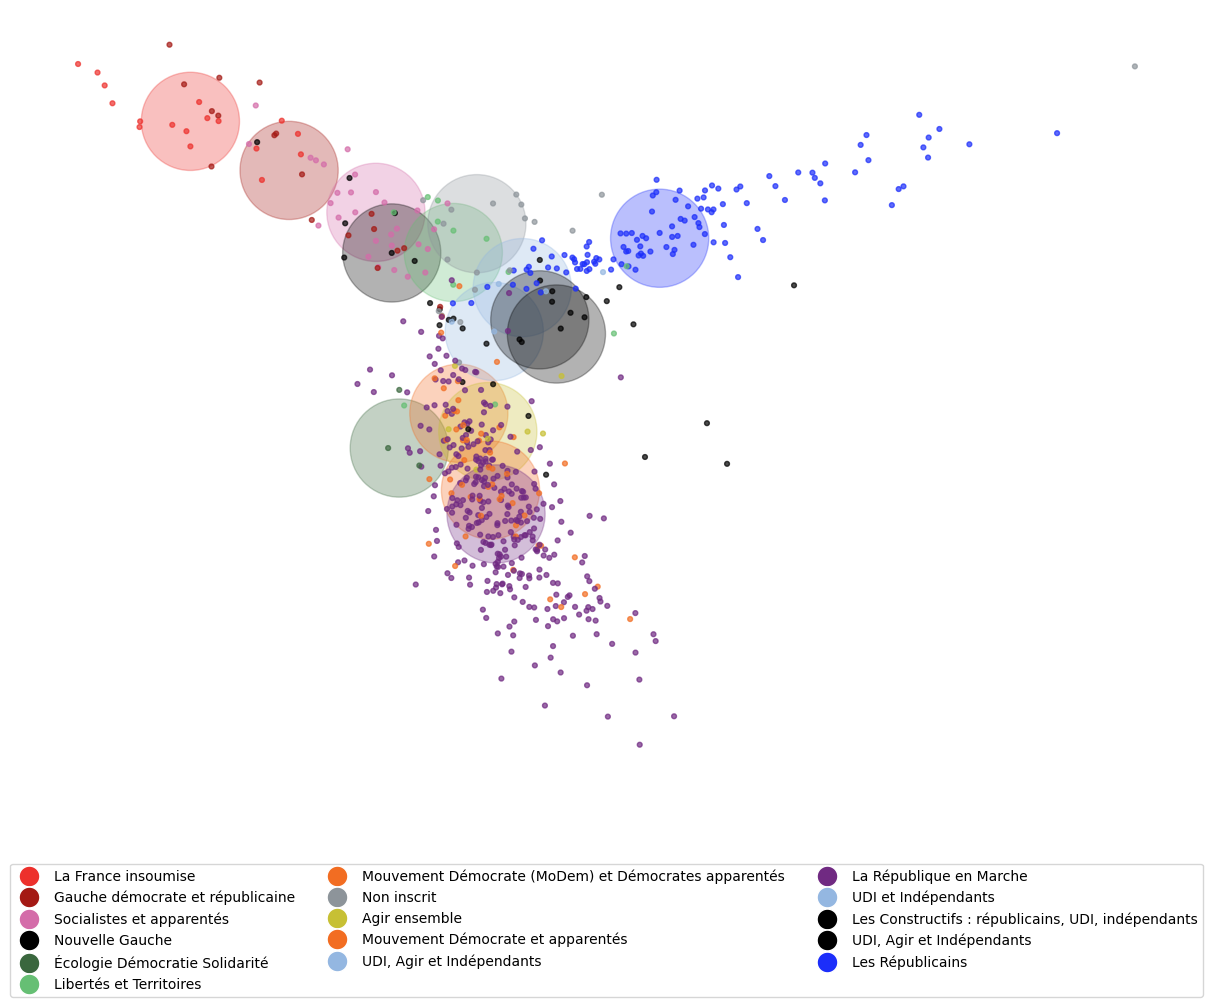

In [25]:
fig, ax = plt.subplots()

(
    axe
    .join(organes.set_index('uid'))
    .assign(
        couleurAssociee = lambda df: df.couleurAssociee.fillna('#000000')
    )
    .plot
    .scatter(
        x="axe 2",
        y="axe 1",
        c="couleurAssociee",
        alpha=0.3,
        s=5000,
        ax=ax,
    )
)

(
    mapping
    .assign(
        couleurAssociee = lambda df: df.couleurAssociee.fillna('#000000')
    )
    .plot
    .scatter(
        x="axe 2",
        y="axe 1",
        s=12,
        #a="loyaute",
        alpha= 0.7, #1-loyautes.loyaute.fillna(0),
        c="couleurAssociee",
        figsize=(15,10),
        ax=ax
    )
)

plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', label=org['libelle'], markerfacecolor=org['couleurAssociee'], markersize=15)
        for org in axe
            .join(organes.set_index('uid'))
            .assign(
                couleurAssociee = lambda df: df.couleurAssociee.fillna('#000000')
            )
            .to_records()
    ],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3
)

ax.axis('off')

plt.savefig('graphics/acteurs_pca_scrutins.png', bbox_inches='tight')

plt.show()